<a href="https://colab.research.google.com/github/ritabandutta13/CE888/blob/main/Lab8/transfer_learning_FE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#!ls "/content/drive/My Drive"

In [ ]:
#unzip file
!unzip -u "/content/drive/MyDrive/data.zip"

Archive:  /content/drive/MyDrive/data.zip
   creating: data/
   creating: data/cats/
  inflating: data/cats/cat.1.jpg     
  inflating: data/cats/cat.10.jpg    
  inflating: data/cats/cat.100.jpg   
  inflating: data/cats/cat.101.jpg   
  inflating: data/cats/cat.102.jpg   
  inflating: data/cats/cat.103.jpg   
  inflating: data/cats/cat.104.jpg   
  inflating: data/cats/cat.105.jpg   
  inflating: data/cats/cat.106.jpg   
  inflating: data/cats/cat.107.jpg   
  inflating: data/cats/cat.108.jpg   
  inflating: data/cats/cat.109.jpg   
  inflating: data/cats/cat.11.jpg    
  inflating: data/cats/cat.110.jpg   
  inflating: data/cats/cat.111.jpg   
  inflating: data/cats/cat.112.jpg   
  inflating: data/cats/cat.113.jpg   
  inflating: data/cats/cat.114.jpg   
  inflating: data/cats/cat.115.jpg   
  inflating: data/cats/cat.116.jpg   
  inflating: data/cats/cat.117.jpg   
  inflating: data/cats/cat.118.jpg   
  inflating: data/cats/cat.119.jpg   
  inflating: data/cats/cat.12.jpg    
  i

In [ ]:
# Unzip training data
#from zipfile import ZipFile
#file_name = "data"
#with ZipFile(file_name, 'r') as zip:
#  zip.extractall()
#  print('done')

In [ ]:
import os
# Get all the paths
data_dir_list = os.listdir('/content/data')
#print(data_dir_list)

In [ ]:
data_dir_list

['cats', 'Humans', 'dogs', 'horses']

In [ ]:
#for index, file in enumerate(files):
#    os.rename(os.path.join(path, file), os.path.join(path, ''.join(['riders-' + str(index), '.jpg'])))

In [ ]:
path, dirs, files = next(os.walk("/content/data"))


In [ ]:
data_paths = [os.path.join(path, f) 
    for path, dirs, files in os.walk("/content/data") for f in files]

In [ ]:
file_count = len(data_paths)
print(file_count)

808


In [ ]:
# Make new base directory
original_dataset_dir = '/content/data'
base_dir = '/content/animals'
os.mkdir(base_dir)

In [ ]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [ ]:
validation_dir

'/content/animals/validation'

In [ ]:
print(808/4)
print(202*0.5)
print(101/2)

202.0
101.0
50.5


In [ ]:
#for i in range(1, 102):
 #   print(i)

In [ ]:
import shutil
import math
fnames = ['rider-{}.jpg'.format(i) for i in range(1, 102)]
for fname in fnames:
    src = os.path.join("/content/data/Humans", fname)
    dst = os.path.join(train_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['rider-{}.jpg'.format(i) for i in range(102, 153)]
for fname in fnames:
    src = os.path.join("/content/data/Humans", fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['rider-{}.jpg'.format(i) for i in range(153, 203)]
for fname in fnames:
    src = os.path.join("/content/data/Humans", fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1, 102)]
for fname in fnames:
    src = os.path.join("/content/data/cats", fname)
    dst = os.path.join(train_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(102, 153)]
for fname in fnames:
    src = os.path.join("/content/data/cats", fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(153, 203)]
for fname in fnames:
    src = os.path.join("/content/data/cats", fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1, 102)]
for fname in fnames:
    src = os.path.join("/content/data/dogs", fname)
    dst = os.path.join(train_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(102, 153)]
for fname in fnames:
    src = os.path.join("/content/data/dogs", fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(153, 203)]
for fname in fnames:
    src = os.path.join("/content/data/dogs", fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['horse-{}.jpg'.format(i) for i in range(1, 102)]
for fname in fnames:
    src = os.path.join("/content/data/horses", fname)
    dst = os.path.join(train_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['horse-{}.jpg'.format(i) for i in range(102, 153)]
for fname in fnames:
    src = os.path.join("/content/data/horses", fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['horse-{}.jpg'.format(i) for i in range(153, 203)]
for fname in fnames:
    src = os.path.join("/content/data/horses", fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
import cv2
import numpy as np
from random import shuffle

IMG_SIZE = 224
LR = 1e-4

In [ ]:
def label_img(img):
    word_label = img.split('.')[0]
    word_label1 = img.split('-')[0]
    if word_label == 'dog': return [1, 0, 0, 0]
    elif word_label == 'cat': return [0, 1, 0, 0]
    elif word_label1 == 'horse': return [0, 0, 1, 0]
    elif word_label1 == 'rider': return [0, 0, 0, 1]

In [ ]:
#from sklearn.preprocessing import OneHotEncoder
#label_encoder = LabelEncoder()
#integer_encoded = label_encoder.fit_transform(y_train)

In [ ]:
def createDataSplitSet(datapath):
    X=[]
    y=[]

    for img in os.listdir(datapath):
        label = label_img(img)
        # print(label)
        path = os.path.join(datapath, img)
        image = cv2.resize(cv2.imread(path), (IMG_SIZE, IMG_SIZE))
        image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

        X.append(np.array(image))
        y.append(label)

    return np.array(X), np.array(y)

In [ ]:
train_X, train_y = createDataSplitSet(train_dir)
val_X, val_y = createDataSplitSet(validation_dir)
test_X, test_y = createDataSplitSet(test_dir)

In [ ]:
print(train_X.shape)
print(train_y.shape)
print(val_X.shape)
print(test_X.shape)

(404, 224, 224, 3)
(404, 4)
(204, 224, 224, 3)
(200, 224, 224, 3)


In [ ]:
train_y

array([[1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       ...,
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0]])

In [ ]:
## Inception model
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Model

img_input = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

In [ ]:
from keras.models import Model
from tensorflow import keras
from keras.layers import Dropout
from keras.layers import GlobalAveragePooling2D
base_model = Xception(input_shape=(224, 224, 3), weights='imagenet', include_top=False) #False - define model and extract features from the train dataset using the VGG16 pre-trained model
#base_model.trainable = False #freeze all layers in the base_model

input = keras.Input(shape=(224, 224, 3))
x = base_model(input) #make sure base_model is running in inference mode

# add additional layers
x = GlobalAveragePooling2D()(x) #convert features to vectors
x = Dense(512, activation='relu')(x) 
x = Dropout(0.5)(x) 
output = Dense(4, activation='softmax')(x) #4 classes


for layer in base_model.layers [:-1]:
  layer.trainable = False


# add layer to the pre-trained base_model
model = Model(input, output)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 2052      
Total params: 21,912,620
Trainable params: 1,051,140
Non-trainable params: 20,861,480
_________________________________________

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks_list = [
    EarlyStopping(monitor="val_loss", patience=3, verbose=1, restore_best_weights=True),
    ModelCheckpoint(filepath='top_model.h5', monitor ="val_loss", mode="min", save_best_only=True)]

In [ ]:
epochs = 10 #set epochs to 10 while experimenting, hoever setting this higher doesn't seem to help
history = model.fit(train_X, train_y,
          steps_per_epoch = 100,
          batch_size=20,
          epochs=20, 
          validation_data=(val_X, val_y),
          callbacks = callbacks_list)

Epoch 1/20
100/100 [==============================] - 3s 35ms/step - loss: 0.0654 - acc: 0.9809 - val_loss: 0.0330 - val_acc: 0.9804
Epoch 2/20
100/100 [==============================] - 3s 34ms/step - loss: 0.0358 - acc: 0.9896 - val_loss: 0.0435 - val_acc: 0.9853
Epoch 3/20
100/100 [==============================] - 3s 34ms/step - loss: 0.0069 - acc: 0.9979 - val_loss: 0.0449 - val_acc: 0.9902
Epoch 4/20
100/100 [==============================] - 3s 34ms/step - loss: 0.0067 - acc: 0.9969 - val_loss: 0.0088 - val_acc: 1.0000
Epoch 5/20
100/100 [==============================] - 1s 9ms/step - loss: 0.0695 - acc: 0.9792 - val_loss: 0.1068 - val_acc: 0.9853


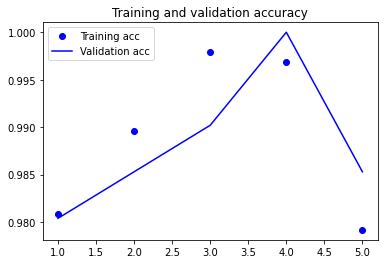

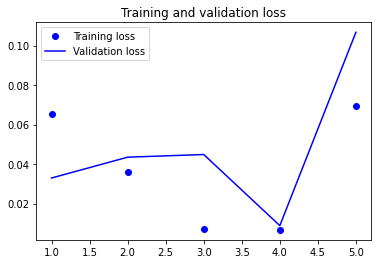

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

## Test Accuracy
predictions = model.predict(test_X)
ypred = predictions > 0.5
test_acc = accuracy_score(test_y, ypred)

from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

precision, recall, f1score, _ = precision_recall_fscore_support(test_y, ypred, average='macro')

auc = roc_auc_score(test_y, ypred)

print("Train Accuracy:\t", acc[-1])
print("Val Accuracy:\t", val_acc[-1])
print("Test Accuracy:\t", test_acc)
print("Precision:\t", precision)
print("Recall:\t\t", recall)
print("F1 Score:\t", f1score)
print("AUC:\t\t", auc)

Train Accuracy:	 0.9791666865348816
Val Accuracy:	 0.9852941036224365
Test Accuracy:	 0.91
Precision:	 0.9207115705061002
Recall:		 0.9099999999999999
F1 Score:	 0.9082554569665384
AUC:		 0.94
